<a href="https://colab.research.google.com/github/ArthurMarchiDS/Portfolio/blob/master/Analisando_os_Dados_do_AirBnb_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados do AirBnb - Madrid**
---

O [AirBnb](https://www.airbnb.com.br/) é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.

Está presente em 190 países e em mais de 34 mil cidades, conta com mais de 2 milhões de acomodações.
Conectando pessoas que querem se hospedar com anfitriões que querem alugar seus imóveis, o AirBnb oferece uma plataforma inovadora.

Uma das iniciativas do AirBnb é disponibilizar dados do site,para algumas das principais cidades do mundo, por meio do portal [Inside AirBnb](http://insideairbnb.com/get-the-data.html) onde é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.





# **Obtenção dos Dados**
---




Todos os dados utilizados foram retirados do site [Inside AirBnb](https://http://insideairbnb.com/) na data de 10/02/2020.

Para esta análise exploratória inicial, utilizou-se o arquivo:

*   listings.csv - *Summary information and metrics for listings in Madrid (good for visualisations).*






Para a análise será necessário utilizar as seguintes bibliotecas:

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Importar o arquivo listings.csv e armazenar em uma variável:

df = pd.read_csv('http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2019-11-09/visualisations/listings.csv')

# **Análise dos Dados**


---




Esta etapa tem como objetivo delimitar os itens para os dados analisados, tais como:

Dicionário das variáveis:

*   id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciada
*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do anfitrião
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*   longitude - coordenada da longitude da propriedade
*   room_type - informa o tipo de quarto que é oferecido
*   price - preço para alugar o imóvel
*   minimum_nights - quantidade mínima de noites para reservar
*   number_of_reviews - número de reviews que a propriedade possui
*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos visualizar o nosso dataset, analisando as 5 primeiras entradas.

In [5]:
df.head() # Traz os primeiros registros - Apenas para visualizarmos como está o Dataset.


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,68,2019-10-10,0.58,2,89
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,2018-07-15,0.53,2,99
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,60,30,0,NaN,NaN,5,312
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,5,2019-10-29,0.08,1,361
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,65,2019-10-14,0.63,1,322


In [6]:
df.neighbourhood.unique() # - Aqui "chamamos" a coluna 'Neighbourhood' e utilizamos a função unique para mostrar os registros dessa coluna apenas uma vez.

array(['Hispanoamérica', 'Cármenes', 'Legazpi', 'Universidad', 'Justicia',
       'Sol', 'Embajadores', 'Palacio', 'Peñagrande', 'Cortes',
       'Recoletos', 'Cuatro Caminos', 'Valverde', 'Pueblo Nuevo',
       'Trafalgar', 'Almagro', 'Pilar', 'Rios Rosas', 'Los Angeles',
       'Arapiles', 'Piovera', 'Castellana', 'Argüelles', 'Puerta Bonita',
       'Canillas', 'San Isidro', 'Aluche', 'Valdefuentes',
       'Puerta del Angel', 'Delicias', 'Pacífico', 'Ciudad Jardín',
       'Palos de Moguer', 'Almenara', 'Guindalera', 'Niño Jesús',
       'Acacias', 'Fuente del Berro', 'Valdeacederas', 'Goya',
       'Bellas Vistas', 'Casa de Campo', 'Comillas', 'Rosas', 'Palomas',
       'Jerónimos', 'Concepción', 'Arcos', 'Hellín', 'Costillares',
       'Gaztambide', 'Ibiza', 'Casco Histórico de Vallecas',
       'Casco Histórico de Barajas', 'San Fermín', 'Berruguete', 'Lucero',
       'Aravaca', 'Palomeras Bajas', 'Prosperidad', 'Santa Eugenia',
       'Castilla', 'Lista', 'Numancia', 'Pinar del

## Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

Para responder a essa pergunta iremos analisar a quantidade de entradas que o Dataset possui e analisar os tipos de cada coluna.


In [7]:
display(df.dtypes) # Com isso podemos ver os tipos de dados que cada coluna possui, sendo Inteiro(int64), String(object) e Ponto Flutuante(float64).

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
df.shape[0]
df.shape[1]

print('Variáveis:\t{}'.format(df.shape[0]))
print ('Entradas:\t{}' .format(df.shape[1]))

Variáveis:	20539
Entradas:	16


Assim podemos visualizar que o Dataset possui 20.539 Linhas e 16 Colunas.

## Qual a porcentagem de valores ausentes no dataset?

Para responder essa pergunta iremos verificar quantos valores faltantes possui o nosso Dataset.

In [9]:
df.isnull() # Utilizamos a função isnull para identificar valores nulos

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20534,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
20535,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
20536,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
20537,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [10]:
df.isnull().sum() # Acrescentamos a função 'sum' que soma a quantidades de registros nulos encontrados 

id                                   0
name                                 4
host_id                              0
host_name                           12
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3907
reviews_per_month                 3907
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [11]:
df.isnull().sum().sort_values()# Podemos também acrescentar a função 'Sort Values' para ordenar em ordem crescente.

id                                   0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
name                                 4
host_name                           12
last_review                       3907
reviews_per_month                 3907
dtype: int64

## Qual o tipo de distribuição das variáveis?

Para analisar a distribuição das variáveis, vamos plotar, para ficar mais fácil a visualização.

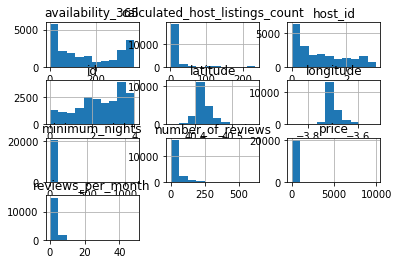

In [12]:
df.hist(); # Utilizando o histograma vemos que fica difícil a visualização, para isso teremos que configurar nossos gráficos.

Utilizando dessa forma, pode dificultar a visualização e algumas informações podem não ser identificadas no primeiro olhar.

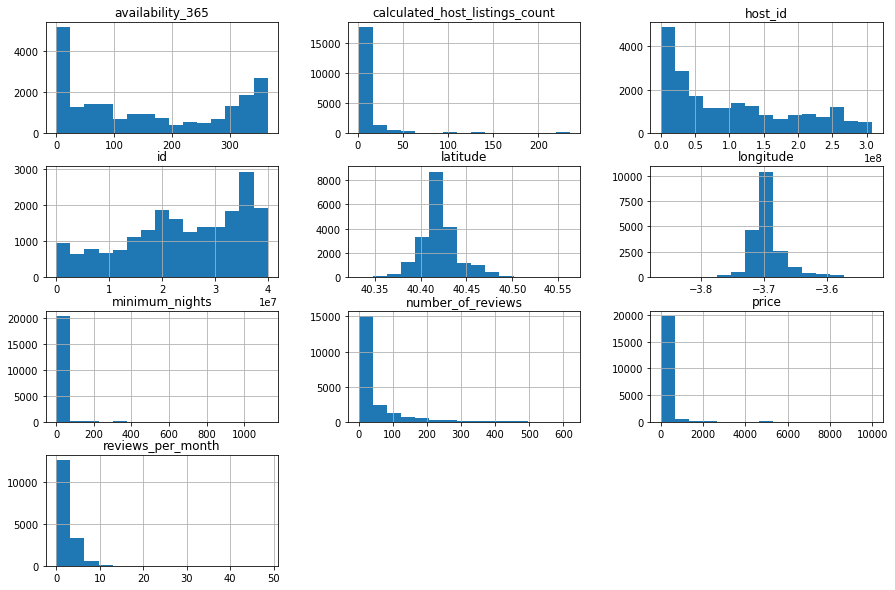

In [13]:
df.hist(bins=15, figsize=(15,10)); # Assim configuramos o tamanho de nosso gráfico para melhor visualização

Muito melhor visualizar desse jeito !

## Há outliers presentes?

Pela distribuição do histograma podemos visualizar que nosso Dataset possui outliers.

Olhe por exemplo as variáveis Price e Minimum_Nights.

Os valores parecem não seguir uma distribuição e acabam distorcendo a representação gráfica.

Podemos utilizar duas maneiras rápidas de que podem auxiliar a detecção de outliers:

* Resumo estatístico por meio do método describe()
* Plotar boxplot para cada variável

In [14]:
df.describe() # Resumo estatístico das variáveis

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.053900e+04,2.053900e+04,20539.000000,20539.000000,20539.000000,20539.000000,20539.000000,16632.000000,20539.000000,20539.000000
mean,2.397699e+07,1.023091e+08,40.420437,-3.694345,136.968402,4.407177,37.799747,2.070853,11.129023,157.990311
std,1.112229e+07,9.070424e+07,0.021864,0.027793,395.092799,20.983241,64.515471,2.045338,30.184278,134.846613
min,6.369000e+03,5.154000e+03,40.332470,-3.863910,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.631621e+07,2.247792e+07,40.409520,-3.707450,40.000000,1.000000,1.000000,0.470000,1.000000,24.000000
50%,2.492250e+07,7.724138e+07,40.418720,-3.701180,65.000000,2.000000,10.000000,1.420000,2.000000,130.000000
75%,3.455137e+07,1.707211e+08,40.428660,-3.689045,101.000000,3.000000,46.000000,3.120000,7.000000,309.000000
max,3.997022e+07,3.081276e+08,40.562740,-3.527660,9999.000000,1125.000000,619.000000,48.600000,235.000000,365.000000


Analisando o resumo acima podemos tirar algumas conclusões preliminares, tais como:

* A variável price possui 75% do valor abaixo de 101, mas seu registro máximo é de 9.999
* A quantidade mínima de noites (minimum_nights) está acima do limite real de 365 dias por ano

Só para citar alguns exemplos.

### Boxplot  - Minimum Nights

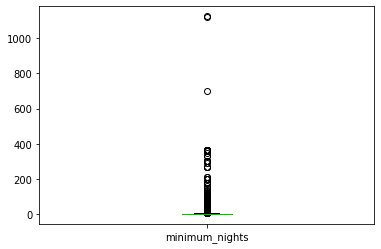

In [15]:
df.minimum_nights.plot(kind='box') # Selecionamos a coluna minimum_nights e utilizamos a função plot e usamos o parâmetro para utilizar o tipo 'Box'.

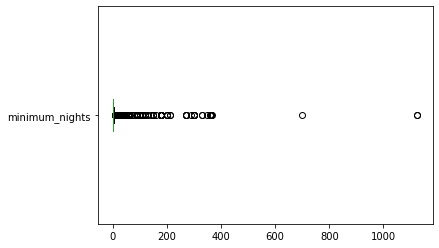

In [16]:
df.minimum_nights.plot(kind='box', vert=False) # Utilizamos mais um parâmetro, dessa vez para visualizarmos na horizontal.

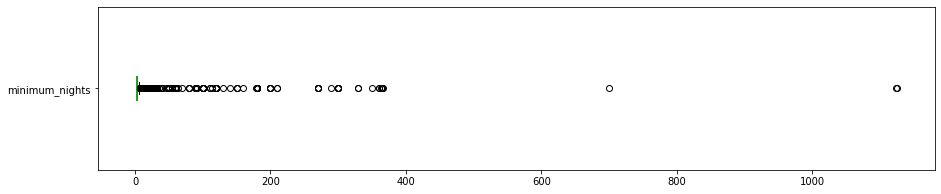

In [17]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));# Acrescentamos mais um parâmetro para melhor visualizar a representação.

230 entradas
1.1198%


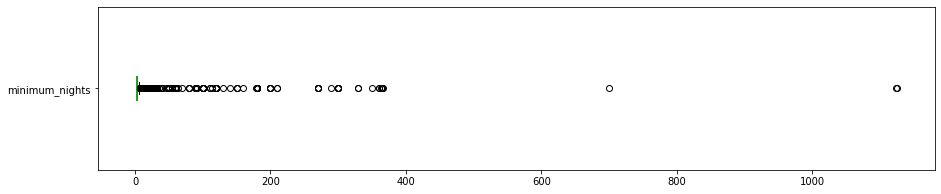

In [18]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));


# Iremos contar quantos registros acima de 30 possui a coluna minimum_nights- Para isso usamos a função len
print("{} entradas".format(len(df[df.minimum_nights > 30])))

# Convertemos em porcentagem para entender o quanto esses registros impactam no nosso Dataset
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Boxplot - Price

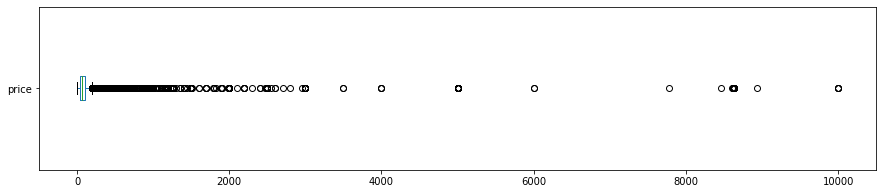

In [19]:
df.price.plot(kind='box', vert=False, figsize=(15,3))

332 entradas
1.6164%


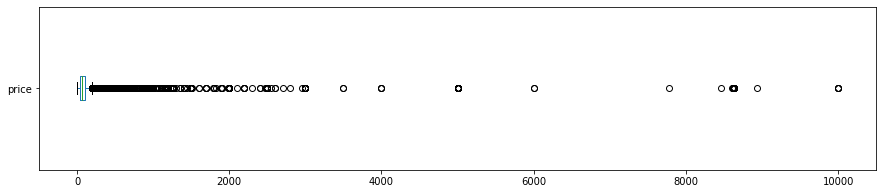

In [20]:
df.price.plot(kind='box', vert=False, figsize=(15,3))

#Contamos quantos registros acima de 1.000 possui a coluna price
print("{} entradas".format(len(df[df.price > 1000])))

# Novamente convertemos em porcentagem para entendermos o impacto desses dados em nosso Dataset
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

### Histograma sem outliers

Iremos fazer os mesmos histogramas utilizados acima, mas iremos retirar os outliers para visualizarmos o impacto deles em nossos gráficos.

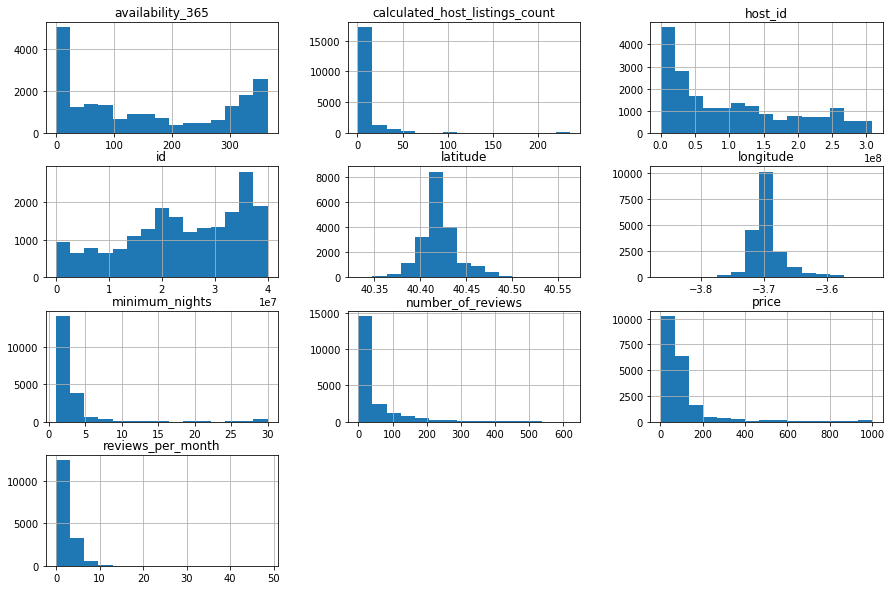

In [21]:
df_clean = df.copy() # Utilizei a função 'copy' e armazenei na variável 'df_clean'.

df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

df_clean.hist(bins=15, figsize=(15,10));

Analisando o histograma das colunas minimum_nights e price, comparando com o histograma gerado antes da limpeza dos dados, já conseguimos notar uma maior variação dos registros e uma melhor distribuição da representação gráfica.

## Qual a correlação existente entre as variáveis?

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Não confundir com relação de causa e efeito.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. 

Para identificar as correlações existentes iremos utilizar dois métodos:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [22]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.047985,-0.127203,-0.069564,0.007615,0.119732
minimum_nights,-0.047985,1.000000,-0.090079,-0.168532,0.010097,0.024322
number_of_reviews,-0.127203,-0.090079,1.000000,0.615431,-0.056461,0.064691
reviews_per_month,-0.069564,-0.168532,0.615431,1.000000,-0.101421,0.029688
calculated_host_listings_count,0.007615,0.010097,-0.056461,-0.101421,1.000000,0.193762
availability_365,0.119732,0.024322,0.064691,0.029688,0.193762,1.000000


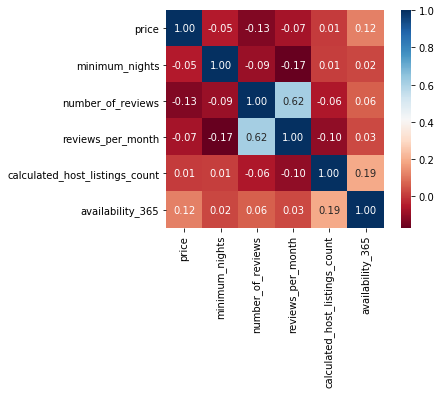

In [23]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Qual o tipo de imóvel mais alugado no AirBnb?

A coluna room_type indica qual o tipo de imóvel disponível para locação.

Se não sabe como funciona o AirBnb, saiba que é possível alugar um apartamento inteiro, ou apenas um quarto ou até mesmo um quarto compartilhado.

Utilizando o método value_counts, iremos contar a quantidade de ocorrências de cada tipo de aluguel.

In [24]:
df_clean.room_type.value_counts() # Utilizamos o Dataset, usamos a coluna room_type e o método 'value_counts' para contar os registros.

Entire home/apt    12255
Private room        7097
Hotel room           384
Shared room          243
Name: room_type, dtype: int64

## Vemos que o método retornou a quantidade de cada tipo de aluguel, sendo:
* Apartamento inteiro: 12.255 registros
* Quarto: 7.097
* Quarto de hotel: 384
* Quarto compartilhado: 243

In [25]:
df_clean.room_type.value_counts() / df_clean.shape[0] *100 # Assim convertemos o valor em porcentagem para visualizar como esse dado impacta em nosso Dataset.

Entire home/apt    61.339406
Private room       35.522298
Hotel room          1.922018
Shared room         1.216277
Name: room_type, dtype: float64

## Qual a localidade mais cara de Madrid?

Para chegarmos à resposta iremos agrupar os dados e analisar os registros por bairro.

In [33]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Hellín          355.866667
Rosas           277.540000
Canillejas      273.887324
Arcos           267.355556
Palomas         236.476190
La Paz          206.423077
El Pardo        204.000000
Simancas        199.530973
Rejas           191.456790
Valdefuentes    174.162500
Name: price, dtype: float64

## Atráves do método utilizado acima, agrupamos os bairros, comparamos com a coluna price tiramos a média e ordenamos em valores de forma descendente.

## Para visualizarmos a distribuição dos imóveis vamos plotar utilizando como parâmetros a latitude e longitude

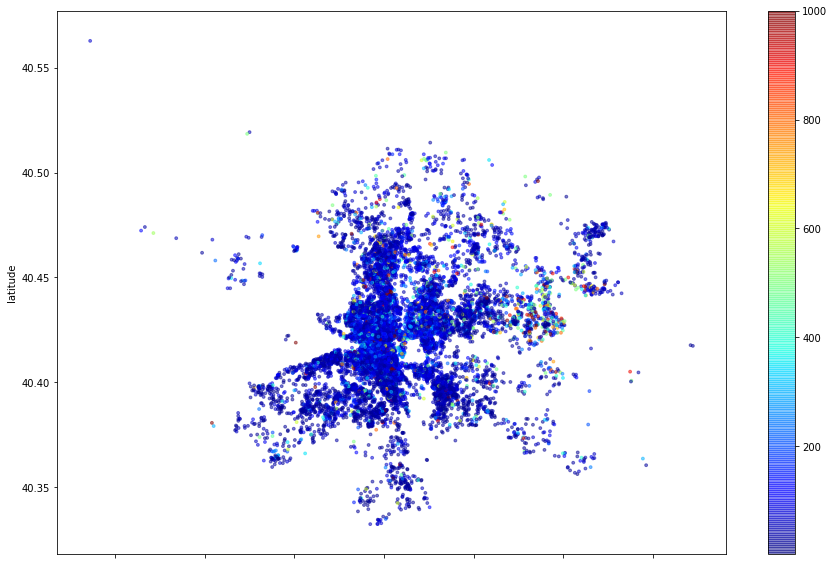

In [52]:
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(15,10));

# **Conclusões**
---

Fizemos uma análise superficial na base de dados do AirBnb, porém podemos chegar à algumas conclusões.
Conseguimos identificar qual o tipo de aluguel mais buscado e também a média de valores e a média de noites podendo identificar os hábitos de consumo dos clientes do AirBnb na cidade de Madrid.

Nota-se também a existência de outliers, o que pode distorcer as informações de nossas análises.

Importante salientar que este Dataset é uma versão resumida, ideal para uma abordagem inicial.

